<a href="https://colab.research.google.com/github/JhonysIV/SenalesAndSistemas/blob/main/Ejercicios_1_2_a_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2: Transformadas en Señales y Sistemas

  Este taller teórico-práctico tiene como objetivo principal la aplicación y comprensión profunda de las principales herramientas de análisis espectral y de sistemas:


Transformada de Fourier: Análisis en el dominio de la frecuencia y aplicaciones en comunicaciones (Modulación AM).

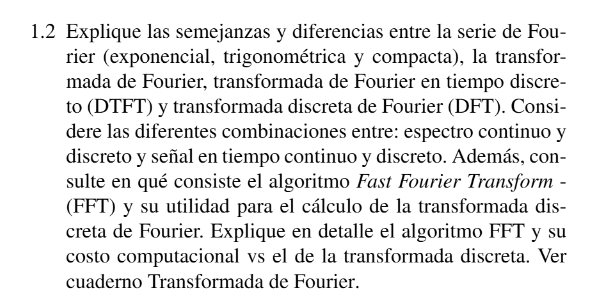


---

##  1.2 Explicación de las Herramientas de Fourier (Sin Tablas)

Las diferentes herramientas de Fourier son variaciones utilizadas para analizar señales, dependiendo de si la **señal** y su **espectro** son continuos o discretos.

### 1. Relación entre la Señal en el Tiempo y el Espectro en la Frecuencia

El análisis de Fourier se puede clasificar según la naturaleza de la señal en el tiempo (continua o discreta) y la naturaleza de su representación en frecuencia (continua o discreta).

* **Serie de Fourier (SF) (Exponencial, Trigonométrica y Compacta):** Esta herramienta se aplica a **señales continuas** en el tiempo ($x(t)$) que son **periódicas**. La representación en frecuencia es **discreta** (una serie de coeficientes $C_n$ a frecuencias armónicas).
* **Transformada de Fourier (TF):** Se aplica a **señales continuas** en el tiempo ($x(t)$) que son **aperiódicas**. Su espectro en frecuencia es **continuo** ($X(\omega)$).
* **Transformada de Fourier en Tiempo Discreto (DTFT):** Esta se utiliza para **señales discretas** en el tiempo ($x[n]$). Su espectro en frecuencia ($X(e^{j\omega})$) es **continuo**, pero con la característica crucial de ser **periódico** en $\omega$. Es una herramienta principalmente teórica.
* **Transformada Discreta de Fourier (DFT):** Esta herramienta es la versión **computacional**. Opera sobre **señales discretas** en el tiempo ($x[n]$) de **longitud finita**. Su espectro en frecuencia ($X[k]$) también es **discreto** (muestras del espectro de la DTFT) y **periódico**.

---

### 2. Algoritmo Fast Fourier Transform (FFT)

#### ¿En qué consiste el algoritmo FFT?
La **Fast Fourier Transform (FFT)** es esencialmente un **algoritmo altamente eficiente** diseñado para calcular la **Transformada Discreta de Fourier (DFT)**. Su principal utilidad es reducir el tiempo de cálculo, haciendo posible el análisis espectral en tiempo real.

El algoritmo más común, como el de Cooley-Tukey, se basa en un principio de **"divide y vencerás"**. Recursivamente, descompone la DFT de una secuencia de longitud $N$ en la combinación de DFTs de menor tamaño (por ejemplo, dos DFTs de $N/2$ puntos), hasta que las sub-transformadas sean triviales de calcular.

#### Costo Computacional (FFT vs. DFT)
La razón por la que la FFT es crucial es su increíble ahorro computacional en comparación con la definición directa de la DFT.

* **Cálculo Directo de la DFT:** Requiere un número de operaciones (multiplicaciones y sumas) que es proporcional a $N^2$ (se denota como **$O(N^2)$**).
* **Cálculo con la FFT:** Si $N$ es una potencia de 2, el algoritmo FFT reduce este requisito a un número de operaciones proporcional a $N \log_2 N$ (se denota como **$O(N \log_2 N)$**).

Por ejemplo, si una señal tiene $N=1024$ muestras, la FFT es aproximadamente **cien veces más rápida** que la DFT directa ($N^2 \approx 1$ millón vs. $N \log_2 N \approx 5$ mil), lo que es una diferencia crítica en sistemas de procesamiento de señales.

---


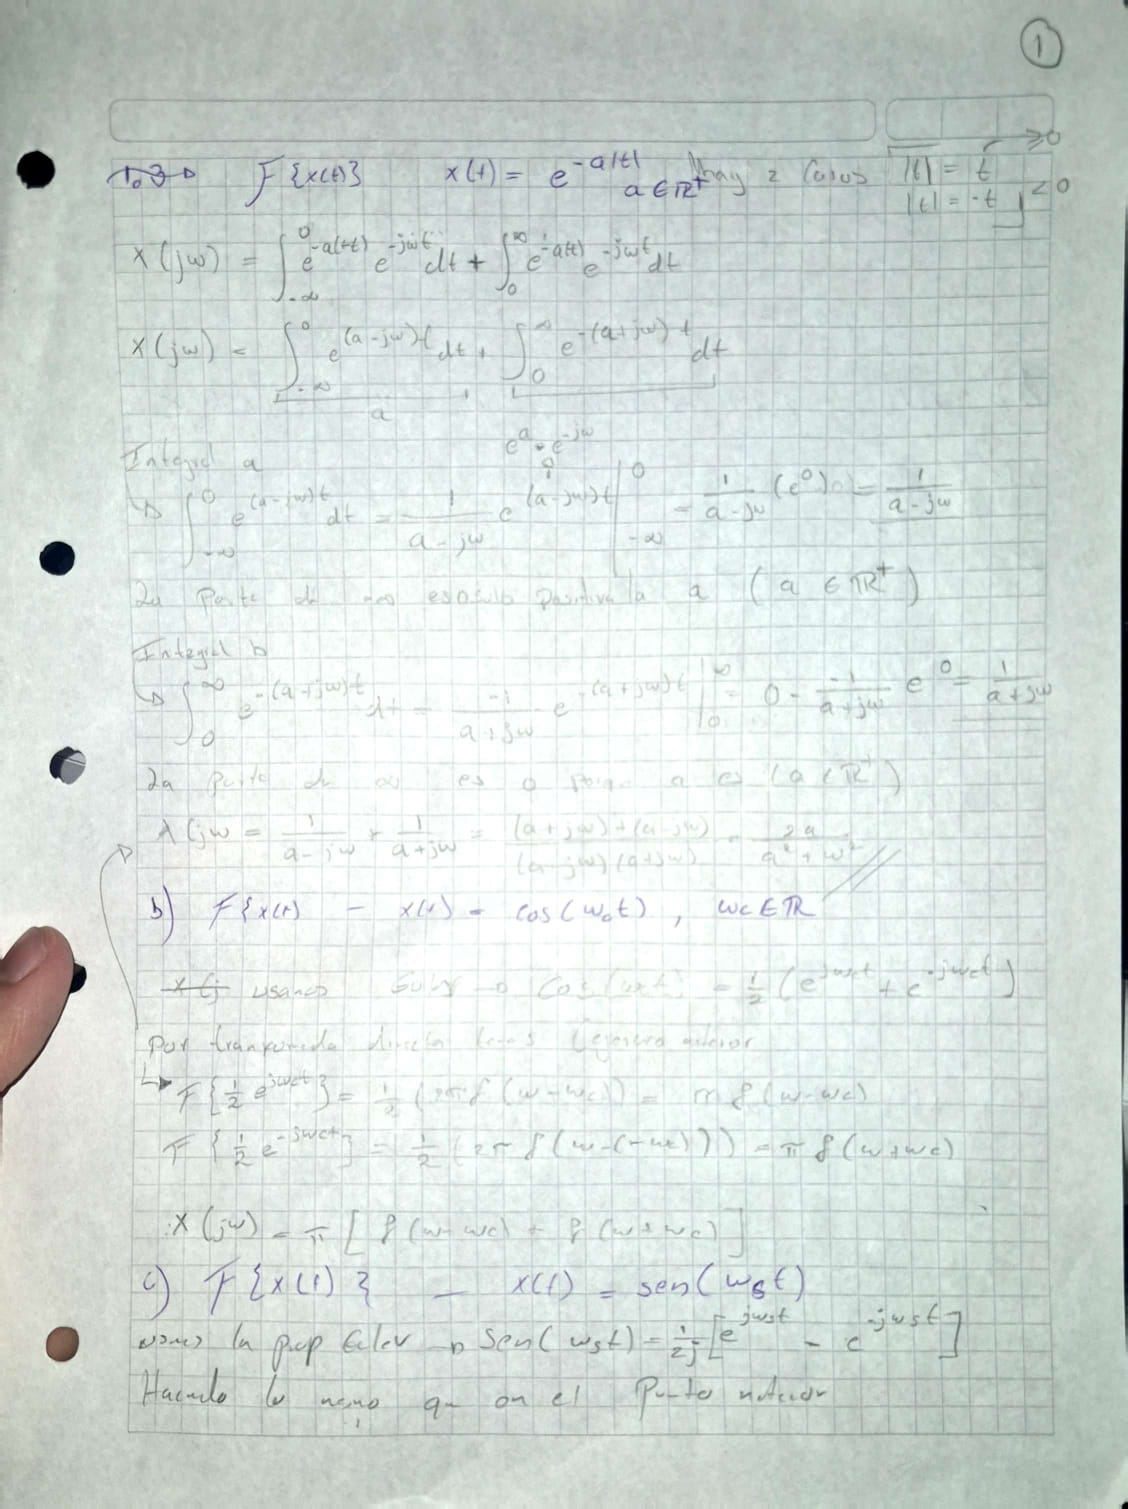

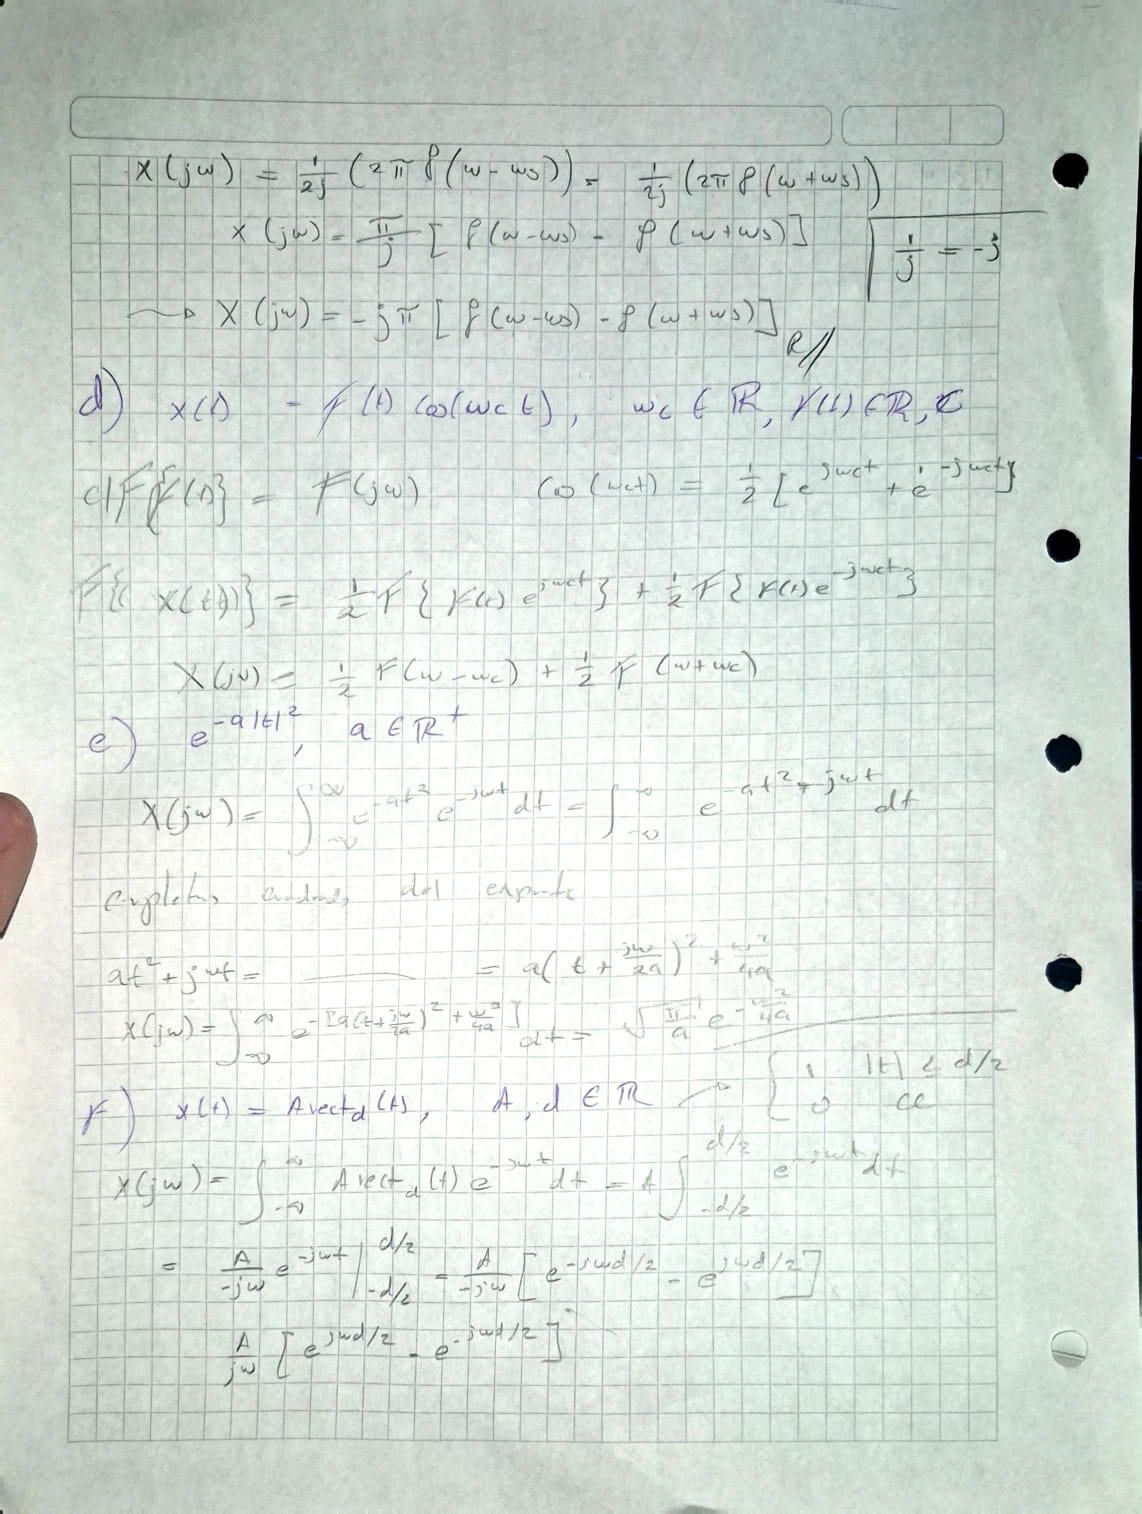

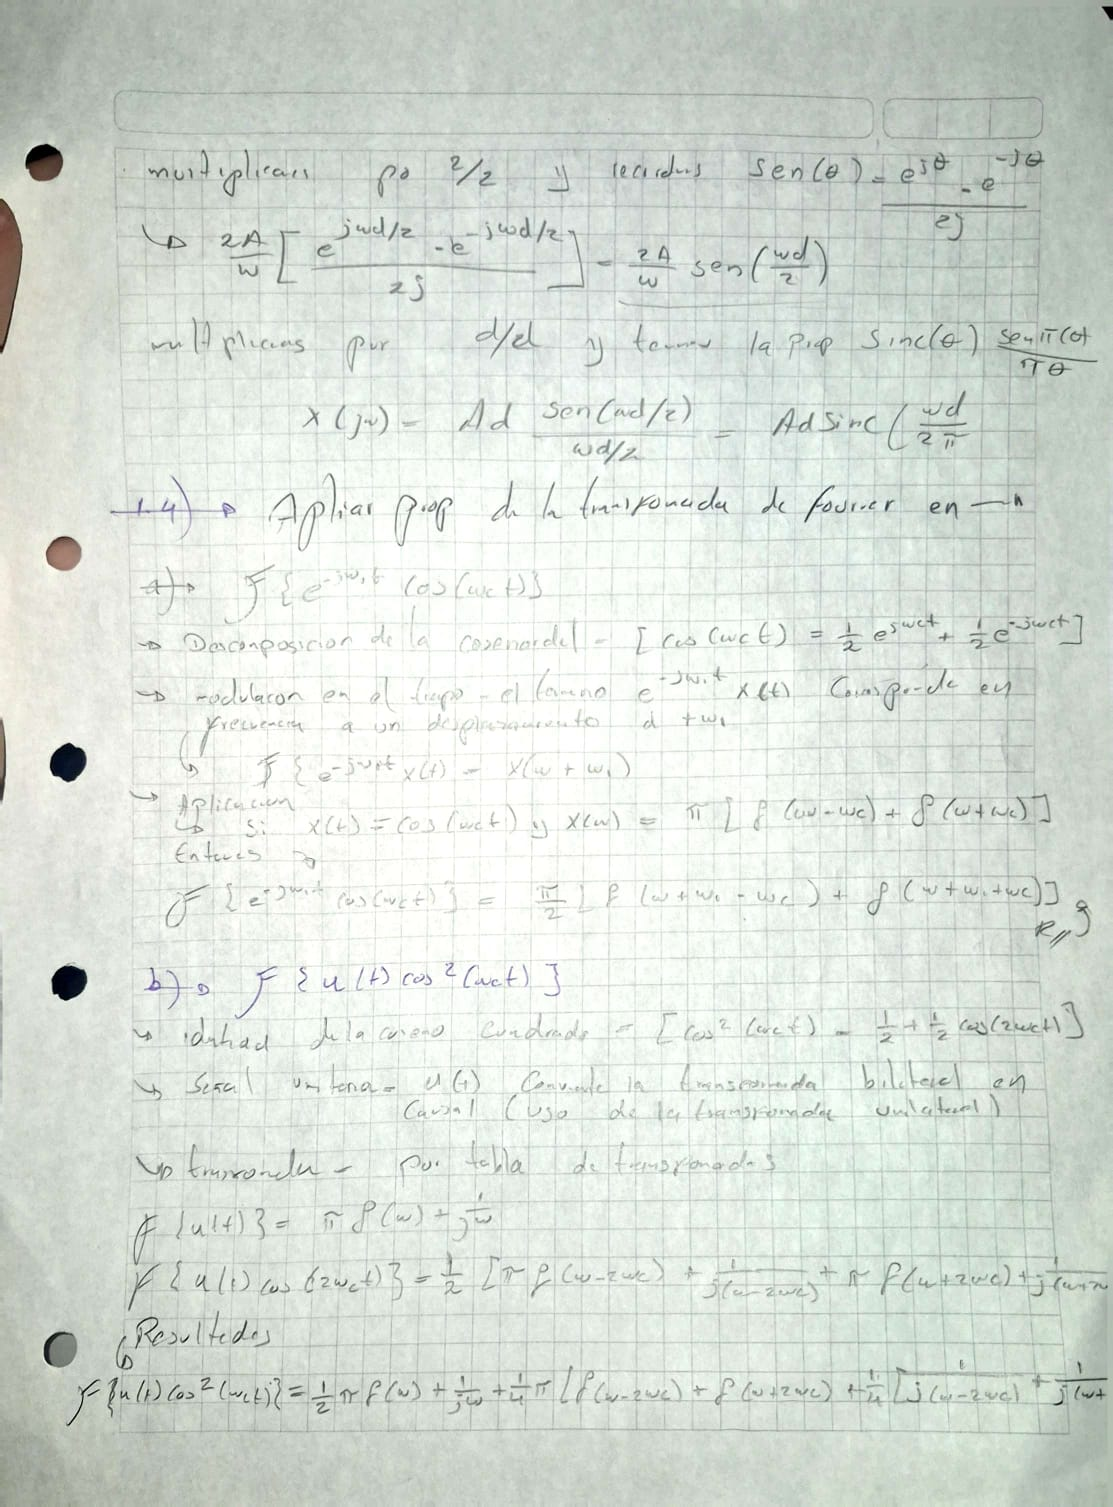

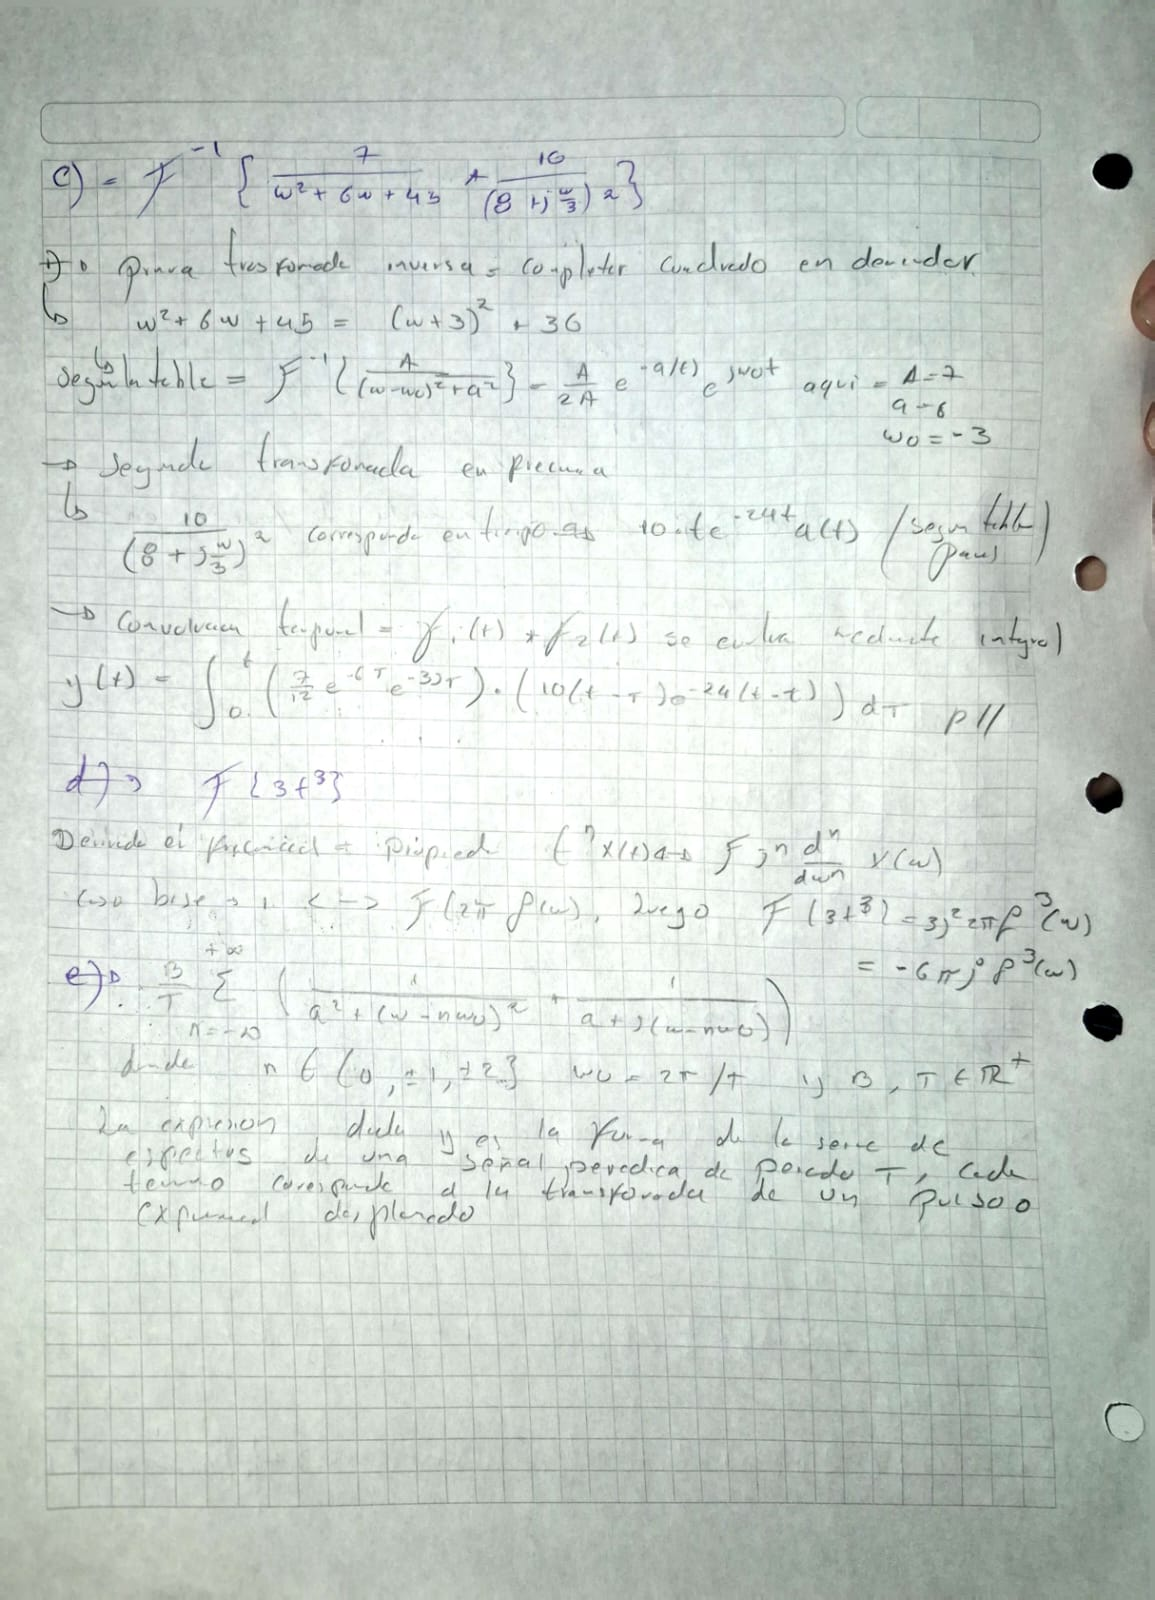

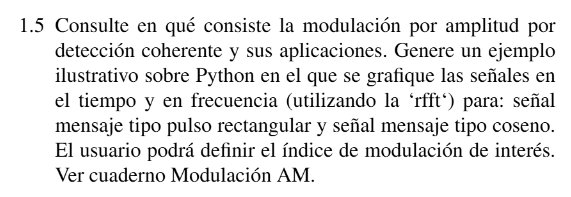

#Modulación de Amplitud con Detección Coherente
La modulación de amplitud (AM) es una técnica para transmitir información, como una señal de audio, a través de una onda portadora de mayor frecuencia. En la detección coherente, también conocida como detección síncrona, el receptor utiliza una réplica exacta de la onda portadora original, tanto en frecuencia como en fase, para demodular la señal y recuperar la información original.

El proceso funciona multiplicando la señal AM recibida por la portadora local generada en el receptor. Después de esta multiplicación, se aplica un filtro pasabajos para eliminar las componentes de alta frecuencia, dejando únicamente la señal de mensaje original recuperada.

La principal ventaja de la detección coherente es su robustez frente al ruido y la interferencia. Al estar sincronizado con la portadora original, el receptor puede discriminar de manera muy efectiva la señal deseada de otras señales no deseadas. Sin embargo, su principal desventaja es la complejidad y el costo de tener que generar una portadora local perfectamente sincronizada en el receptor.

La ecuación matemática de una señal AM de doble banda lateral con portadora (DSB-FC) es:

$$s(t) = A_c[1 + k_a m(t)] \cos(2\pi f_c t)$$

Donde:

$A_c$ es la amplitud de la portadora.

$m(t)$ es la señal mensaje.

$f_c$ es la frecuencia de la portadora.

$k_a$ es la sensibilidad de amplitud del modulador.

El índice de modulación ($m$) es $m = k_a \cdot A_m$, donde $A_m$ es la amplitud máxima de la señal mensaje.

#Aplicaciones Principales
Debido a su complejidad, la detección coherente se reserva para aplicaciones donde la alta fidelidad y la resistencia al ruido son críticas:

Radiodifusión AM Estéreo: En el sistema C-QUAM (Compatible Quadrature Amplitude Modulation), se utiliza para separar las señales de audio izquierda y derecha.

Comunicaciones de Datos: En algunos módems de baja velocidad y sistemas de transmisión de datos donde la integridad de la señal es primordial.
Sistemas de Radar y Telemetría: Se emplea en sistemas que necesitan extraer información precisa de señales débiles y ruidosas.


Introduce el índice de modulación (ej. 0.5, 1.0, 1.5): 0.5


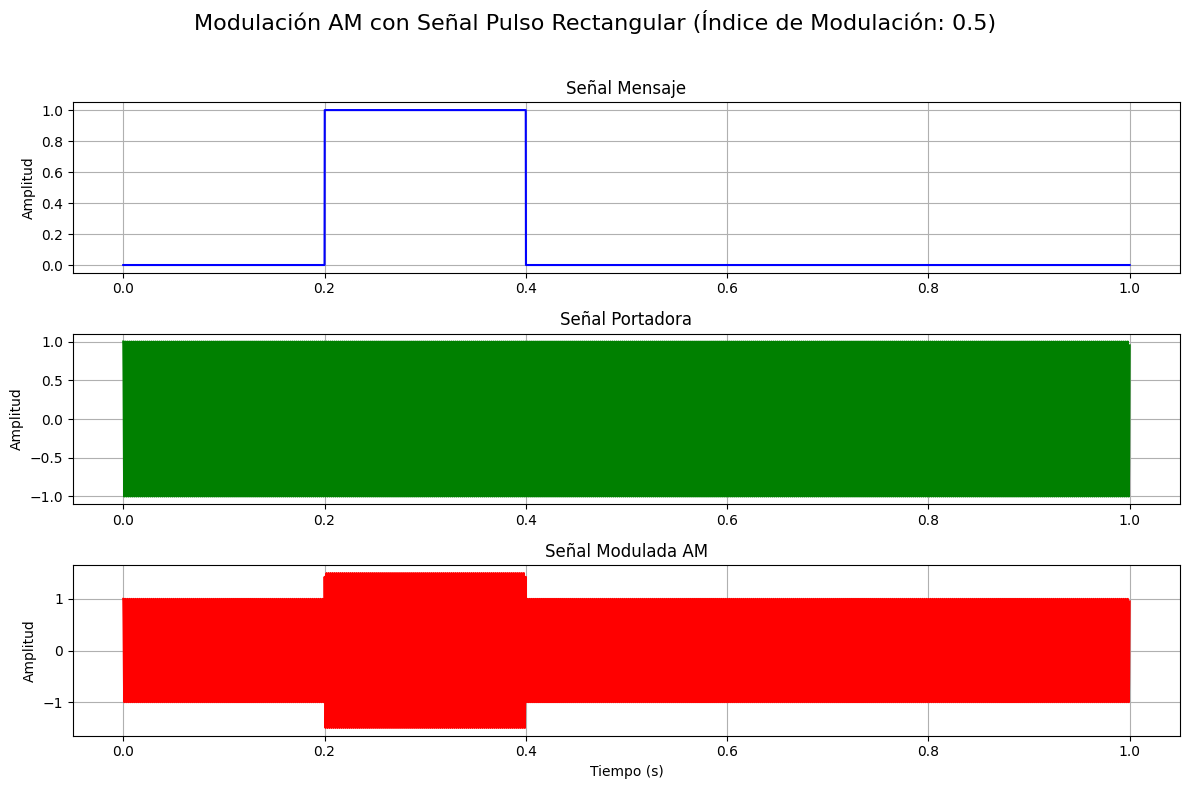

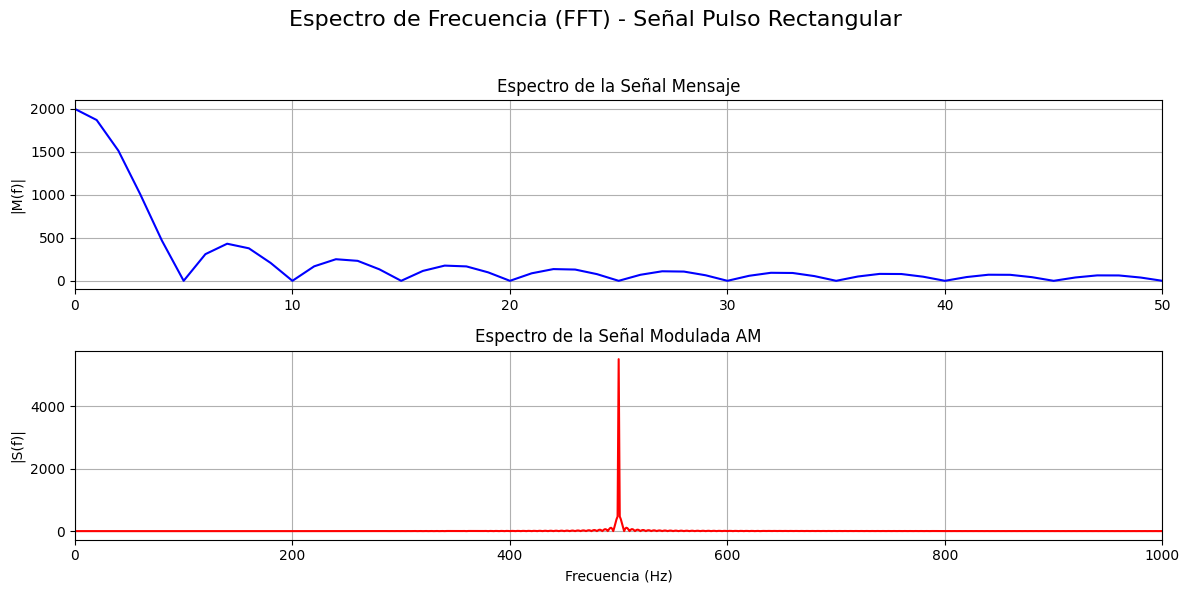

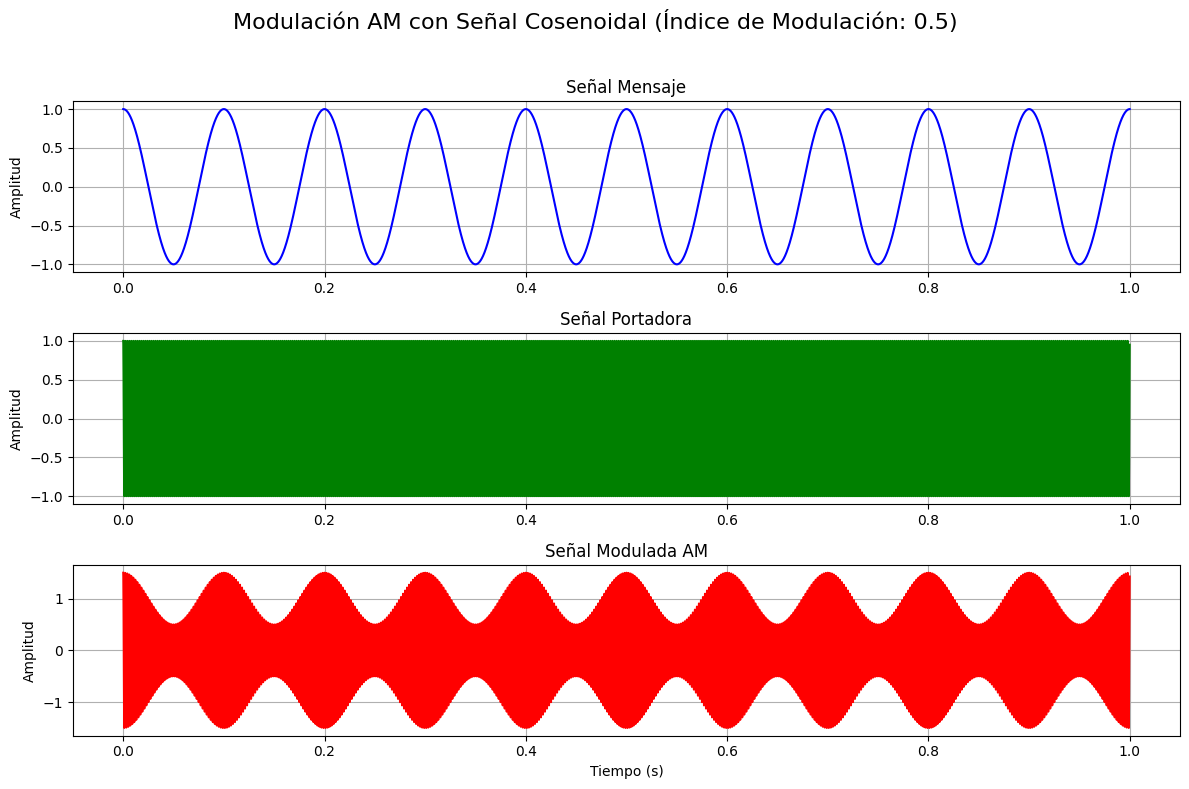

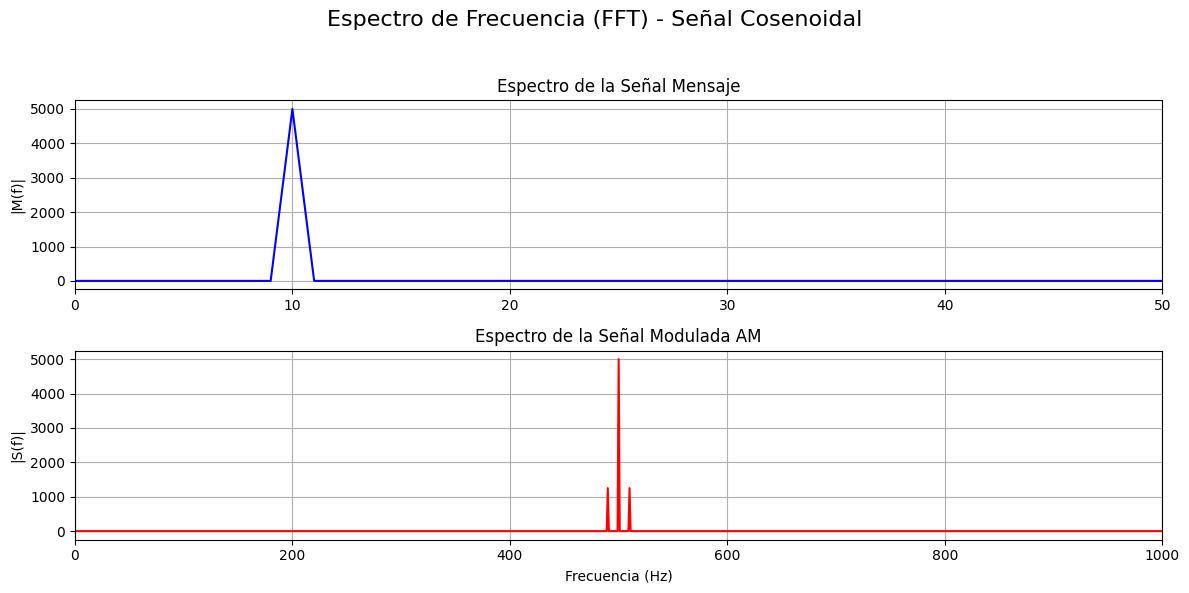

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

def plot_signals(t, msg, carrier, am_signal, modulation_index, msg_type):
    """
    Función para graficar las señales en tiempo y frecuencia.
    """
    # --- Dominio del Tiempo ---
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Modulación AM con Señal {msg_type} (Índice de Modulación: {modulation_index})', fontsize=16)

    plt.subplot(3, 1, 1)
    plt.title('Señal Mensaje')
    plt.plot(t, msg, 'b')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.title('Señal Portadora')
    plt.plot(t, carrier, 'g')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.title('Señal Modulada AM')
    plt.plot(t, am_signal, 'r')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- Dominio de la Frecuencia ---
    N = len(t)
    T = t[1] - t[0]

    yf_msg = rfft(msg)
    xf_msg = rfftfreq(N, T)

    yf_am = rfft(am_signal)
    xf_am = rfftfreq(N, T)

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Espectro de Frecuencia (FFT) - Señal {msg_type}', fontsize=16)

    plt.subplot(2, 1, 1)
    plt.title('Espectro de la Señal Mensaje')
    plt.plot(xf_msg, np.abs(yf_msg), 'b')
    plt.ylabel('|M(f)|')
    plt.xlim(0, fc * 0.1) # Zoom en las frecuencias bajas para la señal mensaje
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.title('Espectro de la Señal Modulada AM')
    plt.plot(xf_am, np.abs(yf_am), 'r')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('|S(f)|')
    plt.xlim(0, fc * 2) # Visualizar hasta el doble de la frecuencia portadora
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# --- Parámetros Generales ---
sampling_rate = 10000  # Tasa de muestreo (Hz)
t = np.arange(0, 1.0, 1/sampling_rate) # Vector de tiempo de 1 segundo

# Frecuencias
fc = 500  # Frecuencia de la portadora (Hz)
fm = 10   # Frecuencia de la señal mensaje (para coseno)

# Amplitudes
Ac = 1.0  # Amplitud de la portadora
Am = 1.0  # Amplitud de la señal mensaje

# --- Elige el índice de modulación ---
# m < 1: Submodulación
# m = 1: Modulación crítica
# m > 1: Soblemodulación
modulation_index = float(input("Introduce el índice de modulación (ej. 0.5, 1.0, 1.5): "))

# Sensibilidad del modulador (ka) se ajusta para obtener el índice deseado
ka = modulation_index / Am

# --- Señal Portadora ---
carrier = Ac * np.cos(2 * np.pi * fc * t)

# ===============================================
#  EJEMPLO 1: SEÑAL MENSAJE TIPO PULSO RECTANGULAR
# ===============================================
msg_pulse = np.zeros_like(t)
# Crear un pulso rectangular entre t=0.2s y t=0.4s
msg_pulse[(t > 0.2) & (t < 0.4)] = Am
am_signal_pulse = Ac * (1 + ka * msg_pulse) * np.cos(2 * np.pi * fc * t)

plot_signals(t, msg_pulse, carrier, am_signal_pulse, modulation_index, "Pulso Rectangular")

# ===============================================
#  EJEMPLO 2: SEÑAL MENSAJE TIPO COSENO
# ===============================================
msg_cosine = Am * np.cos(2 * np.pi * fm * t)
am_signal_cosine = Ac * (1 + ka * msg_cosine) * np.cos(2 * np.pi * fc * t)

plot_signals(t, msg_cosine, carrier, am_signal_cosine, modulation_index, "Cosenoidal")